<a href="https://colab.research.google.com/github/brunadsfreitas/Load_of_data_set_of_final_project/blob/main/Machine_Learning_TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TCC-Pos/microdados-final.csv')

In [ ]:
uf = pd.read_excel('/content/drive/MyDrive/TCC-Pos/Cod_municipio_UF.xlsx')

In [ ]:
uf.shape

(5659, 3)

In [ ]:
df.shape

(909865, 23)

In [ ]:
df.head(10)

,id_municipio,cnae_2_secao,cnae_2_subclasse,saldo_movimentacao,cbo_2002,categoria,grau_instrucao,idade,horas_contratuais,raca_cor,...,tipo_movimentacao,tipo_deficiencia,indicador_trabalho_intermitente,indicador_trabalho_parcial,salario_mensal,tamanho_estabelecimento_janeiro,indicador_aprendiz,indicadordeforadoprazo,mes,ano
0,355030,J,6202300,-1,212420,101,9,27.0,40.0,1,...,40,0,0,0,3708.68,7,0,0,12,2020
1,355030,Q,8610101,-1,212405,101,9,28.0,44.0,1,...,40,0,0,0,6563.30,10,0,0,12,2020
2,355030,J,6201501,-1,212420,101,80,52.0,44.0,1,...,40,0,0,0,2400.00,1,0,0,12,2020
3,261160,N,8299799,1,212405,101,8,23.0,40.0,3,...,20,0,0,0,2000.00,4,0,0,12,2020
4,291920,J,6201501,1,212405,101,8,31.0,44.0,3,...,10,0,0,0,2300.00,7,0,0,12,2020
5,431490,J,6201501,1,212405,101,8,22.0,40.0,1,...,20,0,0,0,1836.49,2,0,0,12,2020
6,130260,C,2622100,1,212420,101,7,52.0,44.0,3,...,20,0,0,0,3745.21,10,0,0,12,2020
7,260960,P,8599604,1,212405,999,9,28.0,44.0,3,...,20,0,0,0,1700.00,3,0,0,12,2020
8,350570,N,8291100,1,212410,101,5,27.0,40.0,6,...,20,0,0,0,2600.00,1,0,0,12,2020
9,317020,J,6203100,-1,212420,101,9,31.0,44.0,1,...,40,0,0,9,3348.00,5,0,0,12,2020


In [ ]:
uf.head(10)

,Código,Descrição,Normalizacao_UF
0,110001,RO,0.035714
1,110002,RO,0.035714
2,110003,RO,0.035714
3,110004,RO,0.035714
4,110005,RO,0.035714
5,110006,RO,0.035714
6,110007,RO,0.035714
7,110008,RO,0.035714
8,110009,RO,0.035714
9,110010,RO,0.035714


In [ ]:
df= df.merge(uf, left_on = 'id_municipio', right_on = 'Código', how = 'left')

In [ ]:
df

,id_municipio,cnae_2_secao,cnae_2_subclasse,saldo_movimentacao,cbo_2002,categoria,grau_instrucao,idade,horas_contratuais,raca_cor,...,indicador_trabalho_parcial,salario_mensal,tamanho_estabelecimento_janeiro,indicador_aprendiz,indicadordeforadoprazo,mes,ano,Código,Descrição,Normalizacao_UF
0,355030,J,6202300,-1,212420,101,9,27.0,40.0,1,...,0,3708.68,7,0,0,12,2020,355030,SP,0.714286
1,355030,Q,8610101,-1,212405,101,9,28.0,44.0,1,...,0,6563.30,10,0,0,12,2020,355030,SP,0.714286
2,355030,J,6201501,-1,212420,101,80,52.0,44.0,1,...,0,2400.00,1,0,0,12,2020,355030,SP,0.714286
3,261160,N,8299799,1,212405,101,8,23.0,40.0,3,...,0,2000.00,4,0,0,12,2020,261160,PE,0.464286
4,291920,J,6201501,1,212405,101,8,31.0,44.0,3,...,0,2300.00,7,0,0,12,2020,291920,BA,0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909860,421320,G,4642701,1,212315,101,6,16.0,20.0,6,...,1,881.97,1,0,0,1,2023,421320,SC,0.785714
909861,421320,G,4642701,1,212315,101,6,16.0,20.0,6,...,1,881.97,1,0,0,1,2023,421320,SC,0.785714
909862,411370,M,7112000,1,212405,101,7,27.0,44.0,1,...,0,1302.00,1,0,0,2,2023,411370,PR,0.750000
909863,350570,J,6201501,-1,212405,101,9,35.0,40.0,1,...,0,3100.00,1,0,0,2,2023,350570,SP,0.714286


In [ ]:
df = df.drop(columns = ['Código','id_municipio','Descrição'])

<ipython-input-12-aec5495f87b2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

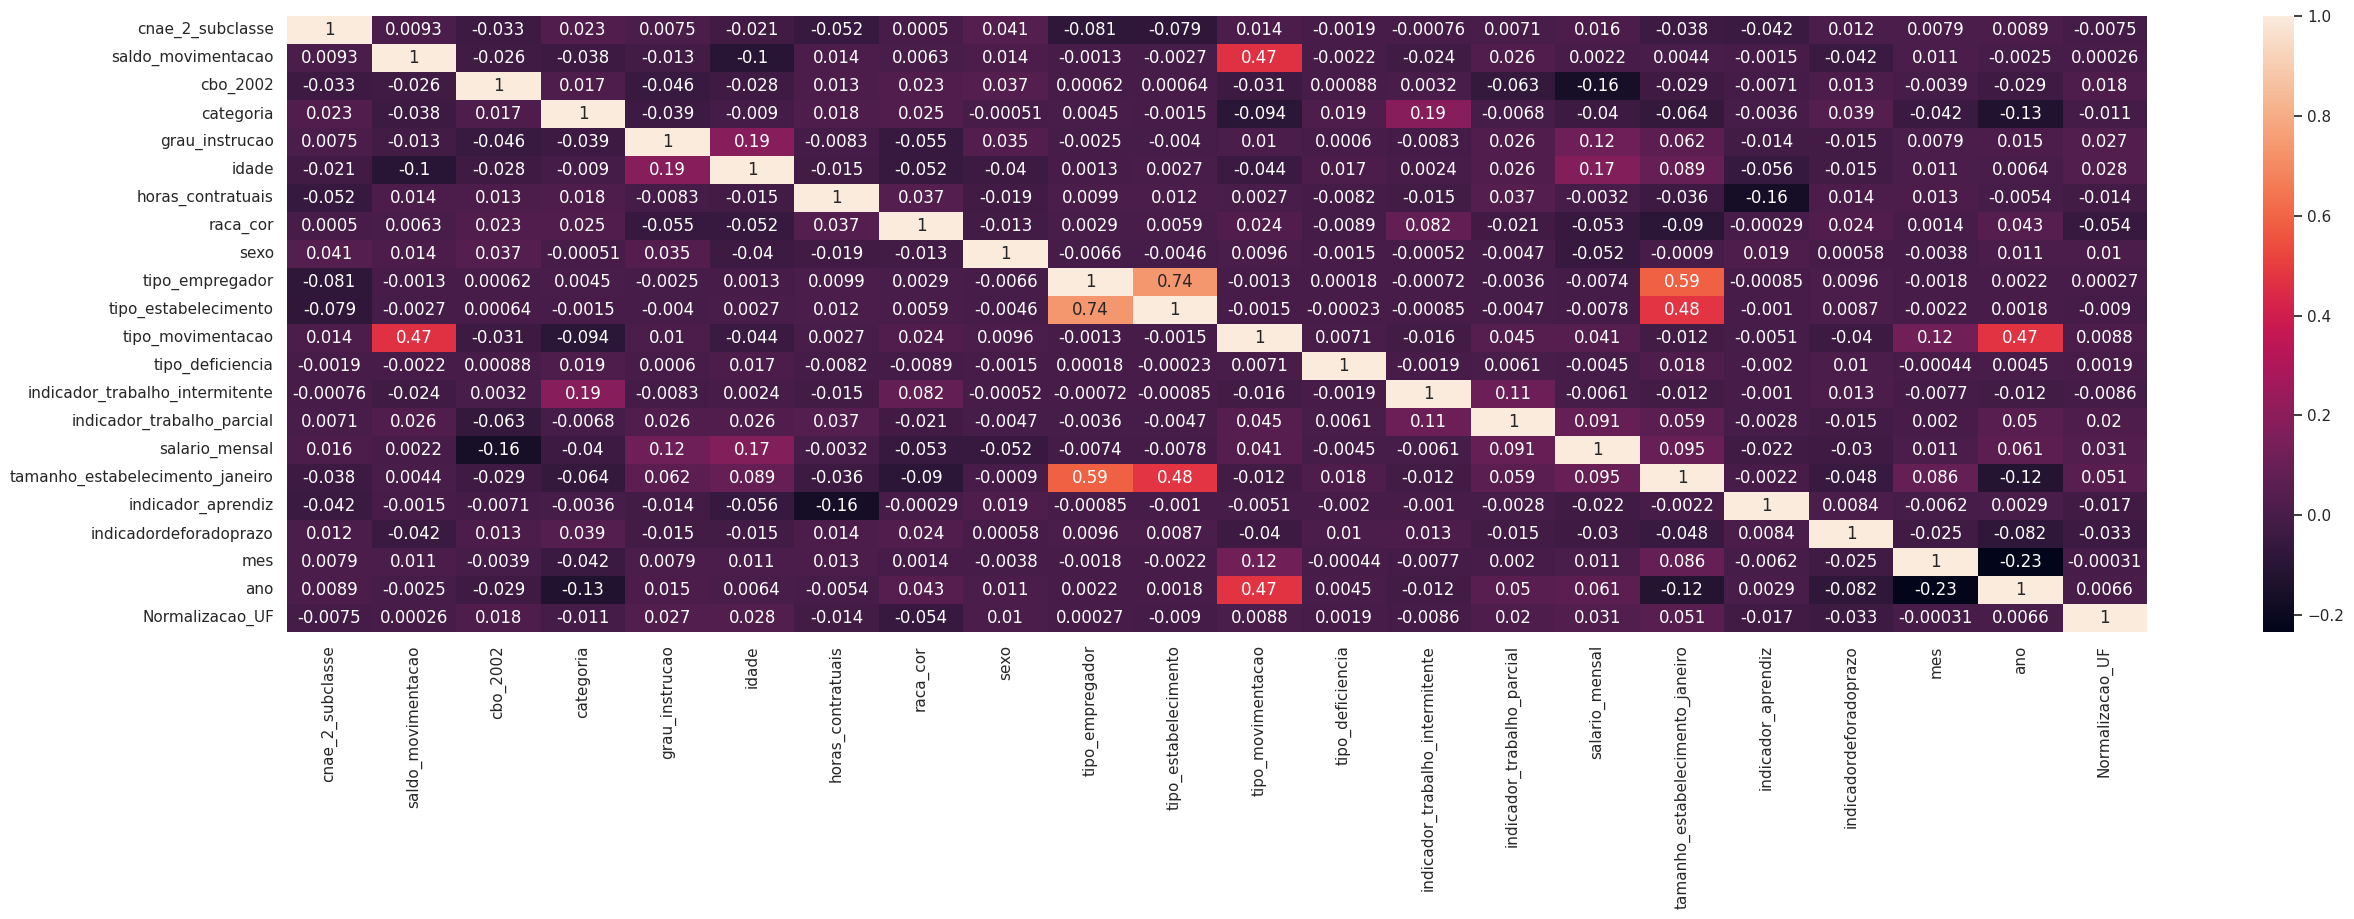

In [ ]:
sns.set(rc = {'figure.figsize':(30, 8)})
sns.heatmap(df.corr(), annot=True)

### **Pré-Processamento dos dados**
Transformação  das variáveis para utilixá-las nos modelos de Machine Learning. Serão as seguintes etapas:

1.   Eliminar as variáveis que não serão utilizadas;

1.   identificação de dados faltantes(missing datas);
3. recorte da massa de dados;

1.   Separação das variáveis;
2.    Processamento das  variáveis numéricas.





 
 




# **1. Eliminar as variáveis que não serão utilizadas**

Em conjunto de dados reais é comum existir variáveis que não tem utilidade prática, por exemplo, RowNumber(ID) entre outras não trazem informações relavantes para entender o cenário analisado e nem ajuda a responder a pergunta que o modelo deseja sanear. Todas essas variáveis devem ser eliminadas

In [ ]:
df1 = df.drop(columns = ['cnae_2_subclasse','cnae_2_secao','tipo_movimentacao','tipo_empregador','tipo_estabelecimento','indicadordeforadoprazo', 'indicador_aprendiz', 'indicador_trabalho_parcial', 'indicador_trabalho_intermitente', 'horas_contratuais'])
df1

,saldo_movimentacao,cbo_2002,categoria,grau_instrucao,idade,raca_cor,sexo,tipo_deficiencia,salario_mensal,tamanho_estabelecimento_janeiro,mes,ano,Normalizacao_UF
0,-1,212420,101,9,27.0,1,1,0,3708.68,7,12,2020,0.714286
1,-1,212405,101,9,28.0,1,3,0,6563.30,10,12,2020,0.714286
2,-1,212420,101,80,52.0,1,1,0,2400.00,1,12,2020,0.714286
3,1,212405,101,8,23.0,3,1,0,2000.00,4,12,2020,0.464286
4,1,212405,101,8,31.0,3,1,0,2300.00,7,12,2020,0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...
909860,1,212315,101,6,16.0,6,1,0,881.97,1,1,2023,0.785714
909861,1,212315,101,6,16.0,6,3,0,881.97,1,1,2023,0.785714
909862,1,212405,101,7,27.0,1,3,0,1302.00,1,2,2023,0.750000
909863,-1,212405,101,9,35.0,1,3,0,3100.00,1,2,2023,0.714286


## **2. Eliminando dados faltantes**


In [ ]:
df.isnull().sum()

cnae_2_secao                       0
cnae_2_subclasse                   0
saldo_movimentacao                 0
cbo_2002                           0
categoria                          0
grau_instrucao                     0
idade                              0
horas_contratuais                  0
raca_cor                           0
sexo                               0
tipo_empregador                    0
tipo_estabelecimento               0
tipo_movimentacao                  0
tipo_deficiencia                   0
indicador_trabalho_intermitente    0
indicador_trabalho_parcial         0
salario_mensal                     0
tamanho_estabelecimento_janeiro    0
indicador_aprendiz                 0
indicadordeforadoprazo             0
mes                                0
ano                                0
Normalizacao_UF                    0
dtype: int64

## **3. Recorte da massa de dados**

o dataset tem registros de 2020 a março de 2023, para otimizar e também pelo entendimento que a tendencia mais atual seja mais impactante que os registros mais antigos, os dados de anteriores a janeiro de 2023 serão excluídos do modelo.


In [ ]:
print(df1)

       cnae_2_secao  saldo_movimentacao  cbo_2002  categoria  grau_instrucao  \
0                 J                  -1    212420        101               9   
1                 Q                  -1    212405        101               9   
2                 J                  -1    212420        101              80   
3                 N                   1    212405        101               8   
4                 J                   1    212405        101               8   
...             ...                 ...       ...        ...             ...   
909860            G                   1    212315        101               6   
909861            G                   1    212315        101               6   
909862            M                   1    212405        101               7   
909863            J                  -1    212405        101               9   
909864            N                  -1    212315        101               9   

        idade  raca_cor  sexo  tipo_def

In [ ]:
indexNames = df1[ df1['ano'] < 2023 ].index

df1.drop(indexNames, inplace = True)


In [ ]:
df1.shape

(64957, 13)

## **4. Separação das variáveis** 
A variável dependente ( variável que responderá a pergunta do modelo) é a que queremos prever, e as covariáveis ( variáveis independentes), são as variáveis que suportam o modelo, que serão utilizadas para explicar os resultados obtidos.

A variável resposta durante o pre-processamento deve ser separada das demais no dataset.



In [ ]:
y = df1['saldo_movimentacao'].replace([1], 0)
X = df1.drop('saldo_movimentacao', axis = 1)
y

844575   -1
844576   -1
844577    0
844578   -1
844579   -1
         ..
909860    0
909861    0
909862    0
909863   -1
909864   -1
Name: saldo_movimentacao, Length: 64957, dtype: int64

In [ ]:
y = y.replace([-1], 1)
y

844575    1
844576    1
844577    0
844578    1
844579    1
         ..
909860    0
909861    0
909862    0
909863    1
909864    1
Name: saldo_movimentacao, Length: 64957, dtype: int64

Separando as variáveis numéricas das categóricas

Variáveis numéricas são classificadas como variáveis contínuas ou discretas, contínuas possuem grau de precisão, se apresentam com partes decimais, as variáveis discretas são apresentadas com numeros inteiros.

As variáveis categóricas rotulam os atributos, e podem ser nominais ou ordinais.

Nó pré-processamento dos dados é necessário separar as variáveis numéricas das categoricas pois para cada uma se faz necessário um tipo especifico de processamento.

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df1.select_dtypes(include = numerics)
x_cont = df_numeric.columns.values
x_cont = [ 'categoria', 'grau_instrucao','idade', 'salario_mensal',
       'tamanho_estabelecimento_janeiro','Normalizacao_UF','raca_cor','cbo_2002','sexo','tipo_deficiencia'] 
x_cont      

['categoria',
 'grau_instrucao',
 'idade',
 'salario_mensal',
 'tamanho_estabelecimento_janeiro',
 'Normalizacao_UF',
 'raca_cor',
 'cbo_2002',
 'sexo',
 'tipo_deficiencia']

In [ ]:
x_cat =  []
x_cat

[]

Variáveis com mais de 2 categorias, utilizaremos o método get_dummies(), ele transforma casa variável em novas colunas com valores de 1 para quando o registro tem essa variável e 0 para quando não tem.

In [ ]:
x_final =  X

In [ ]:
x_final = pd.get_dummies (data = X, columns = ['cnae_2_secao','raca_cor','cbo_2002','sexo', 'tipo_deficiencia'])
x_final

,categoria,grau_instrucao,idade,salario_mensal,tamanho_estabelecimento_janeiro,mes,ano,Normalizacao_UF,cnae_2_secao_A,cnae_2_secao_B,...,cbo_2002_212430,sexo_1,sexo_3,tipo_deficiencia_0,tipo_deficiencia_1,tipo_deficiencia_2,tipo_deficiencia_3,tipo_deficiencia_4,tipo_deficiencia_5,tipo_deficiencia_6
844575,101,8,35.0,2700.00,1,1,2023,0.714286,0,0,...,0,1,0,1,0,0,0,0,0,0
844576,101,7,22.0,1302.00,1,1,2023,0.821429,0,0,...,0,0,1,1,0,0,0,0,0,0
844577,101,8,22.0,2187.00,1,1,2023,0.714286,0,0,...,0,1,0,1,0,0,0,0,0,0
844578,101,9,40.0,4788.08,1,1,2023,0.607143,0,0,...,0,1,0,1,0,0,0,0,0,0
844579,101,8,22.0,3500.00,1,1,2023,0.714286,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909860,101,6,16.0,881.97,1,1,2023,0.785714,0,0,...,0,1,0,1,0,0,0,0,0,0
909861,101,6,16.0,881.97,1,1,2023,0.785714,0,0,...,0,0,1,1,0,0,0,0,0,0
909862,101,7,27.0,1302.00,1,2,2023,0.750000,0,0,...,0,0,1,1,0,0,0,0,0,0
909863,101,9,35.0,3100.00,1,2,2023,0.714286,0,0,...,0,0,1,1,0,0,0,0,0,0


Para resolver problemas de discrepancias ebtre as variáveis contínuasm deixaremos todas numa escala entre 0 e 1.
O método MiniMax é definido como
valor_normalizacao = (valor - coluna.min)/COuna.max - Coluna.min)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler ()
x_final[x_cont] = scaler.fit_transform(x_final[x_cont])
x_final[x_cont]

,categoria,grau_instrucao,idade,salario_mensal,tamanho_estabelecimento_janeiro,Normalizacao_UF,raca_cor,cbo_2002,sexo,tipo_deficiencia
844575,0.0,0.088608,0.328125,0.004706,0.0,0.703704,0.625,0.911111,0.0,0.0
844576,0.0,0.075949,0.125000,0.002269,0.0,0.814815,0.000,0.933333,1.0,0.0
844577,0.0,0.088608,0.125000,0.003812,0.0,0.703704,0.000,0.511111,0.0,0.0
844578,0.0,0.101266,0.406250,0.008345,0.0,0.592593,0.250,0.955556,0.0,0.0
844579,0.0,0.088608,0.125000,0.006100,0.0,0.703704,0.000,0.888889,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
909860,0.0,0.063291,0.031250,0.001537,0.0,0.777778,0.625,0.488889,0.0,0.0
909861,0.0,0.063291,0.031250,0.001537,0.0,0.777778,0.625,0.488889,1.0,0.0
909862,0.0,0.075949,0.203125,0.002269,0.0,0.740741,0.000,0.888889,1.0,0.0
909863,0.0,0.101266,0.328125,0.005403,0.0,0.703704,0.000,0.888889,1.0,0.0


## **5. Modelagem do Machine Learning**
Prever o perfil mais propenso a demissão é o objetivo da nossa modelagem, sendo uma classificação binária, sendo 1 para demitido e 0 para admitido.
Serão testados os modelos KNN e árvore de decisão que não sofrem muita influência de dados desbalanceados, que é o caso do nosso dataset.


## **Validação Hold-Out**
Divideremos o dataset entre um conjunto de dados de treino e um de teste para podermos validar se o modelo tem um bom desempenho, para treino utilizaremos 70% dos conjunto de dados e 30% para teste

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split (x_final, y, test_size = 0.3, random_state = 1)

In [ ]:
x_treino

,cbo_2002,categoria,grau_instrucao,idade,raca_cor,sexo,tipo_deficiencia,salario_mensal,tamanho_estabelecimento_janeiro,mes,ano,Normalizacao_UF
874645,0.911111,0.000000,0.101266,0.171875,0.000,1.0,0.0,0.015939,0.000000,2,2023,0.703704
881709,0.022222,0.000000,0.101266,0.125000,0.250,0.0,0.0,0.007228,0.000000,2,2023,0.592593
901961,0.911111,0.000000,1.000000,0.390625,0.000,1.0,0.0,0.005229,0.040816,3,2023,0.703704
852197,0.888889,0.000000,0.101266,0.171875,0.000,0.0,0.0,0.010458,0.000000,1,2023,0.666667
900001,0.955556,0.000000,0.088608,0.078125,0.625,0.0,0.0,0.003034,0.040816,3,2023,0.703704
...,...,...,...,...,...,...,...,...,...,...,...,...
877289,0.955556,0.000000,0.075949,0.296875,0.625,1.0,0.0,0.004009,0.000000,2,2023,0.629630
849767,0.888889,0.005568,1.000000,0.484375,0.000,0.0,0.0,0.025596,0.000000,1,2023,0.592593
856747,0.888889,0.000000,0.101266,0.156250,0.000,0.0,0.0,0.004357,0.000000,1,2023,0.703704
877781,0.888889,0.000000,0.101266,0.218750,0.625,0.0,0.0,0.012249,0.000000,2,2023,0.703704


## **Modelo KNN**
Prevê qual será a saída do modelo de acordo com os vizinhos mais próximos no espaço.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_treino, y_treino)

KNeighborsClassifier()

In [ ]:
resultado_knn = knn.predict(x_teste)
print(pd.crosstab(y_teste, resultado_knn, rownames = ['Real'], colnames = ['Predito'], margins = True))

Predito      0     1    All
Real                       
0         5543  4404   9947
1         4565  4976   9541
All      10108  9380  19488


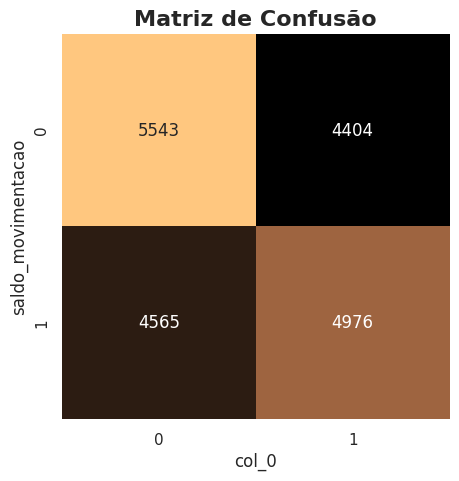

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(pd.crosstab(y_teste, resultado_knn), annot=True, cmap=plt.cm.copper, fmt='g', cbar=False)
plt.title("Matriz de Confusão", fontsize=16, fontweight='bold')
plt.show()

## **Metricas de validação**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_teste, resultado_knn))

              precision    recall  f1-score   support

           0       0.55      0.56      0.55      9947
           1       0.53      0.52      0.53      9541

    accuracy                           0.54     19488
   macro avg       0.54      0.54      0.54     19488
weighted avg       0.54      0.54      0.54     19488



## **Árvore de Decisão**

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

arvore = DecisionTreeClassifier(max_depth = 4)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=4)

In [ ]:
print(pd.crosstab(y_teste, resultado_tree, rownames = ['Real'], colnames = ['Predito'], margins = True))

Predito     0     1    All
Real                      
0        5495  4452   9947
1        4195  5346   9541
All      9690  9798  19488


In [ ]:
print(classification_report(y_teste, resultado_tree))

              precision    recall  f1-score   support

           0       0.57      0.55      0.56      9947
           1       0.55      0.56      0.55      9541

    accuracy                           0.56     19488
   macro avg       0.56      0.56      0.56     19488
weighted avg       0.56      0.56      0.56     19488



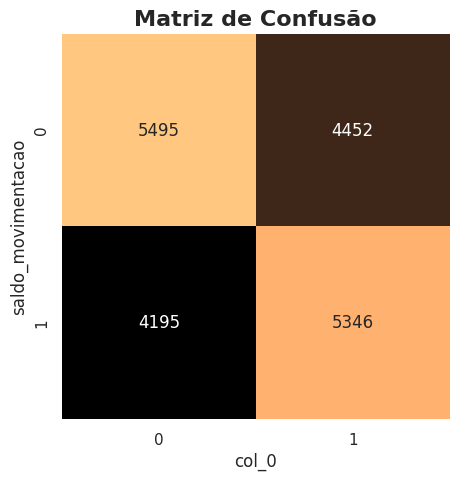

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(pd.crosstab(y_teste, resultado_tree), annot=True, cmap=plt.cm.copper, fmt='g', cbar=False)
plt.title("Matriz de Confusão", fontsize=16, fontweight='bold')
plt.show()

## **Analisando a Árvore**

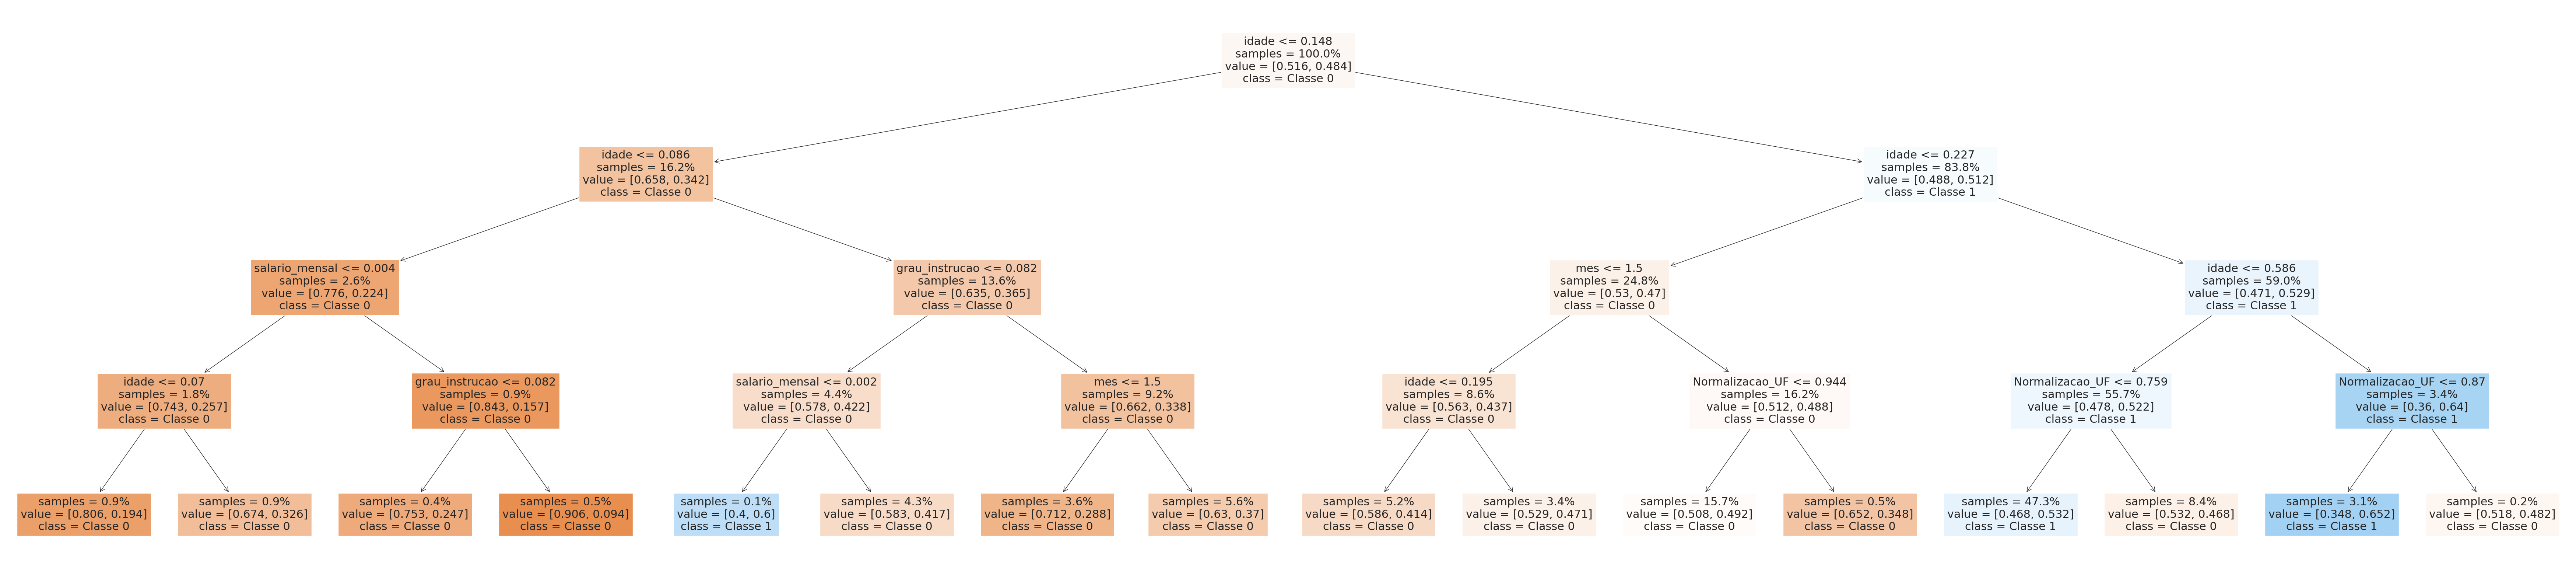

In [ ]:
plt.figure(figsize = (90, 20))
plot_tree(arvore, filled = True, proportion = True, impurity = False, class_names = ['Classe 0', 'Classe 1'], 
          feature_names = x_treino.columns)
plt.show()


In [ ]:
arvore.feature_importances_
feature_importances = pd.DataFrame(arvore.feature_importances_, index = x_treino.columns, columns = ['importance'])
feature_importances.sort_values(by='importance', ascending=False)

,importance
idade,0.832976
Normalizacao_UF,0.069730
mes,0.044305
grau_instrucao,0.038786
salario_mensal,0.014202
cbo_2002,0.000000
categoria,0.000000
raca_cor,0.000000
sexo,0.000000
tipo_deficiencia,0.000000
